In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\santosh nandam\Downloads\air cargo supplychain.xlsx")
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [5]:
df.shape

(20000, 15)

In [7]:
df.isnull().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [9]:
df.dtypes

Shipment ID                        object
Origin Airport                     object
Destination Airport                object
Shipment Weight (kg)              float64
Shipment Volume (m³)              float64
Freight Cost (USD)                float64
Mode of Transport                  object
Carrier Name                       object
Transit Time (hours)                int64
Temperature-Sensitive              object
Perishable Goods                   object
Customs Clearance Time (hours)      int64
Weather Conditions                 object
Day of Week                        object
Delay Status                       object
dtype: object

In [11]:
Transport_Mode=pd.get_dummies(df['Mode of Transport'],drop_first=True)
Transport_Mode=Transport_Mode.astype(int)

In [13]:
Weather=pd.get_dummies(df['Weather Conditions'],drop_first=True)
Weather=Weather.astype(int)

In [15]:
Day=pd.get_dummies(df['Day of Week'],drop_first=True)
Day=Day.astype(int)

In [17]:
Origin=pd.get_dummies(df['Origin Airport'],drop_first=True)
Origin=Origin.astype(int)

In [19]:
Destination=pd.get_dummies(df['Destination Airport'],drop_first=True)
Destination=Destination.astype(int)

In [21]:
Carrier=pd.get_dummies(df['Carrier Name'],drop_first=True)
Carrier=Carrier.astype(int)

In [23]:
df["Temperature-Sensitive"] = df["Temperature-Sensitive"].map({"Yes": 1, "No": 0})
df["Perishable Goods"] = df["Perishable Goods"].map({"Yes": 1, "No": 0})
df["Delay Status"] = df["Delay Status"].map({"Delayed": 1, "On-Time": 0})

In [25]:
df_1=pd.concat([df,Transport_Mode,Weather,Day,Origin,Destination,Carrier],axis=1)
df_1.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,...,DXB,HKG,LHR,NRT,SIN,SYD,Emirates Cargo,FedEx,Lufthansa Cargo,UPS
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,0,...,0,0,1,0,0,0,0,0,0,1
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,0,...,0,0,0,0,1,0,0,0,1,0
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,0,...,0,1,0,0,0,0,0,1,0,0
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,1,...,1,0,0,0,0,0,0,0,0,0
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
df_1.drop(['Mode of Transport','Day of Week','Weather Conditions','Shipment ID','Origin Airport','Destination Airport','Carrier Name'],axis=1,inplace=True)

In [29]:
df_1.head()

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Delay Status,Rail,Truck,...,DXB,HKG,LHR,NRT,SIN,SYD,Emirates Cargo,FedEx,Lufthansa Cargo,UPS
0,655.03,7.80,1238.23,16,0,1,7,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,988.60,37.41,1868.80,21,0,0,5,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,637.71,10.53,1205.49,6,0,0,36,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,367.47,7.70,694.65,17,1,0,16,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,671.23,3.59,1268.86,36,0,0,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
df_1.isnull().sum()

Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Delay Status                      0
Rail                              0
Truck                             0
Foggy                             0
Rainy                             0
Stormy                            0
Monday                            0
Saturday                          0
Sunday                            0
Thursday                          0
Tuesday                           0
Wednesday                         0
DFW                               0
JFK                               0
LAX                               0
MIA                               0
ORD                               0
SFO                               0
DXB                               0
HKG                               0
LHR                         

In [33]:
X=df_1.drop('Delay Status', axis=1).values
Y=df_1['Delay Status'].values

In [35]:
X

array([[6.55030e+02, 7.80000e+00, 1.23823e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [9.88600e+02, 3.74100e+01, 1.86880e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [6.37710e+02, 1.05300e+01, 1.20549e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.11800e+02, 2.95400e+01, 1.34555e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.47040e+02, 4.38000e+00, 2.77960e+02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.61570e+02, 7.08000e+00, 4.94460e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [37]:
Y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10, random_state=20)

In [40]:
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(X_train,Y_train)

LogisticRegression()

In [43]:
y_pred=regr.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.516

In [49]:
from sklearn.metrics import mean_squared_error
r2_score=regr.score(X,Y)
r2_score

0.50585

In [1855]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10, random_state=1)

In [1857]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [1858]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [1859]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5185

In [1409]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10, random_state=8)

In [1411]:
from sklearn.ensemble import RandomForestClassifier
clfs = RandomForestClassifier(n_estimators=10)
clfs.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [1412]:
Y_Pred = clfs.predict(X_test)
Y_Pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [1415]:
Y_test

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1417]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_Pred)

0.5255

In [1419]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10, random_state=20)

In [1421]:
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(X_train,Y_train)

LogisticRegression()

In [1423]:
y_pred=regr.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1425]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.516

In [1427]:
import statsmodels.api as sm

In [1428]:
X=np.append(arr=np.ones(shape=(20000,1),dtype=int),values=X,axis=1)

In [1431]:
X

array([[  1.  , 655.03,   7.8 , ...,   0.  ,   0.  ,   1.  ],
       [  1.  , 988.6 ,  37.41, ...,   0.  ,   1.  ,   0.  ],
       [  1.  , 637.71,  10.53, ...,   1.  ,   0.  ,   0.  ],
       ...,
       [  1.  , 711.8 ,  29.54, ...,   0.  ,   0.  ,   1.  ],
       [  1.  , 147.04,   4.38, ...,   1.  ,   0.  ,   0.  ],
       [  1.  , 261.57,   7.08, ...,   0.  ,   0.  ,   0.  ]])

In [1433]:
x_ov=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7362
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.868
Time:                        12:13:31   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.908e+04
Df Residuals:                   19965   BIC:                         2.935e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5295      0.022     24.291      0.000       0.487       0.572
x1            -0.2185      2.333     -0.094      0.925      -4.790       4.353
x2            -0.0002      0.000     -0.647      0.518      -0.001       0.000
x3             0.1156      1.234      0.094      0.925      -2.303       2.534
x4            -0.0001      0.000     -0.669      0.503      -0.000       0.000
x5             0.0086      0.008      1.120      0.263      -0.006       0.024
x6            -0.0062      0.009     -0.693      0.488      -0.024       0.011
x7            -0.0002      0.000     -0.616      0.538      -0.001       0.000
x8            -0.0161      0.010     -1.596      0.111      -0.036       0.004
x9            -0.0011      0.010     -0.110      0.912      -0.021       0.019
x10           -0.0160      0.012     -1.329      0.184      -0.040       0.008
x11           -0.0024      0.009     -0.261      0.794      -0.020       0.015
x12            0.0024      0.012      0.200      0.841      -0.021       0.026
x13           -0.0074      0.013     -0.560      0.575      -0.033       0.019
x14            0.0029      0.013      0.217      0.828      -0.023       0.029
x15           -0.0126      0.013     -0.954      0.340      -0.038       0.013
x16           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x17            0.0099      0.013      0.750      0.453      -0.016       0.036
x18            0.0078      0.013      0.589      0.556      -0.018       0.034
x19           -0.0161      0.013     -1.219      0.223      -0.042       0.010
x20           -0.0143      0.013     -1.085      0.278      -0.040       0.012
x21           -0.0194      0.013     -1.468      0.142      -0.045       0.006
x22           -0.0245      0.013     -1.844      0.065      -0.050       0.002
x23           -0.0123      0.013     -0.918      0.358      -0.038       0.014
x24           -0.0178      0.013     -1.343      0.179      -0.044       0.008
x25            0.0092      0.013      0.689      0.491      -0.017       0.035
x26            0.0100      0.013      0.754      0.451      -0.016       0.036
x27            0.0012      0.013      0.088      0.930      -0.025       0.027
x28           -0.0005      0.013     -0.035      0.972      -0.026       0.025
x29            0.0191      0.013      1.448      0.148      -0.007       0.045
x30           -0.0054      0.013     -0.409      0.682      -0.032       0.021
x31           -0.0022      0.011     -0.193      0.847      -0.024       0.020
x32           -0.0069      0.011     -0.617      0.538      -0.029       0.015
x33           -0.0098      0.011     -0.883      0.377      -0.032       0.012
x34           -0.0103      0.011     -0.917      0.359      -0.032       0.012
==============================================================================
Om

In [1435]:
x_ov=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7585
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.839
Time:                        12:13:32   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.907e+04
Df Residuals:                   19966   BIC:                         2.934e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5292      0.021     25.464      0.000       0.488       0.570
x1            -0.2182      2.332     -0.094      0.925      -4.790       4.354
x2            -0.0002      0.000     -0.647      0.518      -0.001       0.000
x3             0.1154      1.234      0.094      0.925      -2.303       2.534
x4            -0.0001      0.000     -0.669      0.503      -0.000       0.000
x5             0.0086      0.008      1.120      0.263      -0.006       0.024
x6            -0.0062      0.009     -0.693      0.488      -0.024       0.011
x7            -0.0002      0.000     -0.617      0.537      -0.001       0.000
x8            -0.0161      0.010     -1.596      0.111      -0.036       0.004
x9            -0.0011      0.010     -0.111      0.912      -0.021       0.019
x10           -0.0160      0.012     -1.329      0.184      -0.040       0.008
x11           -0.0024      0.009     -0.261      0.794      -0.020       0.015
x12            0.0024      0.012      0.200      0.841      -0.021       0.026
x13           -0.0074      0.013     -0.560      0.575      -0.033       0.019
x14            0.0029      0.013      0.217      0.828      -0.023       0.029
x15           -0.0126      0.013     -0.954      0.340      -0.038       0.013
x16           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x17            0.0099      0.013      0.750      0.453      -0.016       0.036
x18            0.0078      0.013      0.589      0.556      -0.018       0.034
x19           -0.0161      0.013     -1.219      0.223      -0.042       0.010
x20           -0.0144      0.013     -1.085      0.278      -0.040       0.012
x21           -0.0194      0.013     -1.468      0.142      -0.045       0.006
x22           -0.0245      0.013     -1.844      0.065      -0.050       0.002
x23           -0.0123      0.013     -0.919      0.358      -0.038       0.014
x24           -0.0178      0.013     -1.343      0.179      -0.044       0.008
x25            0.0095      0.012      0.817      0.414      -0.013       0.032
x26            0.0102      0.011      0.895      0.371      -0.012       0.033
x27            0.0014      0.011      0.123      0.902      -0.021       0.024
x28            0.0193      0.011      1.702      0.089      -0.003       0.042
x29           -0.0052      0.012     -0.453      0.651      -0.028       0.017
x30           -0.0022      0.011     -0.193      0.847      -0.024       0.020
x31           -0.0069      0.011     -0.617      0.537      -0.029       0.015
x32           -0.0098      0.011     -0.883      0.377      -0.032       0.012
x33           -0.0103      0.011     -0.917      0.359      -0.032       0.012
==============================================================================
Omnibus:                    68647.083   Durbin-Watson:                   2.006
Pr

In [1437]:
x_ov=X[:,[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8061
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.768
Time:                        12:13:32   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.907e+04
Df Residuals:                   19968   BIC:                         2.932e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5305      0.020     26.864      0.000       0.492       0.569
x1            -0.0002      0.000     -0.644      0.519      -0.001       0.000
x2            -0.0001      0.000     -0.669      0.503      -0.000       0.000
x3             0.0086      0.008      1.118      0.263      -0.006       0.024
x4            -0.0062      0.009     -0.694      0.487      -0.024       0.011
x5            -0.0002      0.000     -0.618      0.537      -0.001       0.000
x6            -0.0162      0.010     -1.596      0.110      -0.036       0.004
x7            -0.0011      0.010     -0.111      0.912      -0.021       0.019
x8            -0.0160      0.012     -1.331      0.183      -0.040       0.008
x9            -0.0024      0.009     -0.259      0.796      -0.020       0.015
x10            0.0024      0.012      0.200      0.841      -0.021       0.026
x11           -0.0074      0.013     -0.562      0.574      -0.033       0.019
x12            0.0029      0.013      0.215      0.830      -0.023       0.029
x13           -0.0126      0.013     -0.956      0.339      -0.038       0.013
x14           -0.0172      0.013     -1.301      0.193      -0.043       0.009
x15            0.0099      0.013      0.748      0.455      -0.016       0.036
x16            0.0078      0.013      0.588      0.557      -0.018       0.034
x17           -0.0161      0.013     -1.221      0.222      -0.042       0.010
x18           -0.0143      0.013     -1.084      0.278      -0.040       0.012
x19           -0.0194      0.013     -1.470      0.141      -0.045       0.006
x20           -0.0245      0.013     -1.844      0.065      -0.050       0.002
x21           -0.0123      0.013     -0.919      0.358      -0.038       0.014
x22           -0.0178      0.013     -1.344      0.179      -0.044       0.008
x23            0.0094      0.012      0.814      0.415      -0.013       0.032
x24            0.0102      0.011      0.894      0.371      -0.012       0.033
x25            0.0014      0.011      0.120      0.904      -0.021       0.024
x26            0.0193      0.011      1.699      0.089      -0.003       0.042
x27           -0.0053      0.012     -0.457      0.647      -0.028       0.017
x28           -0.0022      0.011     -0.192      0.848      -0.024       0.020
x29           -0.0069      0.011     -0.616      0.538      -0.029       0.015
x30           -0.0098      0.011     -0.882      0.378      -0.032       0.012
x31           -0.0103      0.011     -0.918      0.358      -0.032       0.012
==============================================================================
Omnibus:                    68646.729   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.691
Skew:                           0.013   Prob(JB):                         0.00
Ku

In [1439]:
x_ov=X[:,[0,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8326
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.726
Time:                        12:13:33   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.907e+04
Df Residuals:                   19969   BIC:                         2.931e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5303      0.020     26.965      0.000       0.492       0.569
x1            -0.0002      0.000     -0.645      0.519      -0.001       0.000
x2            -0.0001      0.000     -0.668      0.504      -0.000       0.000
x3             0.0086      0.008      1.118      0.264      -0.007       0.024
x4            -0.0062      0.009     -0.696      0.486      -0.024       0.011
x5            -0.0002      0.000     -0.618      0.537      -0.001       0.000
x6            -0.0160      0.010     -1.602      0.109      -0.035       0.004
x7            -0.0160      0.012     -1.330      0.183      -0.040       0.008
x8            -0.0024      0.009     -0.259      0.796      -0.020       0.015
x9             0.0024      0.012      0.201      0.841      -0.021       0.026
x10           -0.0074      0.013     -0.562      0.574      -0.033       0.019
x11            0.0029      0.013      0.215      0.830      -0.023       0.029
x12           -0.0126      0.013     -0.957      0.339      -0.038       0.013
x13           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x14            0.0099      0.013      0.749      0.454      -0.016       0.036
x15            0.0078      0.013      0.588      0.556      -0.018       0.034
x16           -0.0161      0.013     -1.222      0.222      -0.042       0.010
x17           -0.0144      0.013     -1.085      0.278      -0.040       0.012
x18           -0.0194      0.013     -1.470      0.142      -0.045       0.006
x19           -0.0245      0.013     -1.844      0.065      -0.050       0.002
x20           -0.0123      0.013     -0.919      0.358      -0.038       0.014
x21           -0.0177      0.013     -1.343      0.179      -0.044       0.008
x22            0.0094      0.012      0.812      0.417      -0.013       0.032
x23            0.0102      0.011      0.894      0.371      -0.012       0.033
x24            0.0014      0.011      0.120      0.905      -0.021       0.024
x25            0.0193      0.011      1.700      0.089      -0.003       0.042
x26           -0.0053      0.012     -0.458      0.647      -0.028       0.017
x27           -0.0022      0.011     -0.193      0.847      -0.024       0.020
x28           -0.0069      0.011     -0.616      0.538      -0.029       0.015
x29           -0.0098      0.011     -0.883      0.377      -0.032       0.012
x30           -0.0103      0.011     -0.918      0.359      -0.032       0.012
==============================================================================
Omnibus:                    68646.629   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.699
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         445.
==

In [1441]:
x_ov=X[:,[0,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8608
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.680
Time:                        12:13:33   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.907e+04
Df Residuals:                   19970   BIC:                         2.930e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5307      0.019     27.485      0.000       0.493       0.569
x1            -0.0002      0.000     -0.645      0.519      -0.001       0.000
x2            -0.0001      0.000     -0.668      0.504      -0.000       0.000
x3             0.0086      0.008      1.119      0.263      -0.006       0.024
x4            -0.0062      0.009     -0.694      0.488      -0.024       0.011
x5            -0.0002      0.000     -0.618      0.537      -0.001       0.000
x6            -0.0159      0.010     -1.601      0.109      -0.035       0.004
x7            -0.0160      0.012     -1.330      0.183      -0.040       0.008
x8            -0.0024      0.009     -0.258      0.796      -0.020       0.015
x9             0.0024      0.012      0.201      0.841      -0.021       0.026
x10           -0.0074      0.013     -0.562      0.574      -0.033       0.019
x11            0.0029      0.013      0.215      0.830      -0.023       0.029
x12           -0.0126      0.013     -0.957      0.339      -0.038       0.013
x13           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x14            0.0099      0.013      0.748      0.454      -0.016       0.036
x15            0.0078      0.013      0.589      0.556      -0.018       0.034
x16           -0.0161      0.013     -1.223      0.221      -0.042       0.010
x17           -0.0144      0.013     -1.086      0.277      -0.040       0.012
x18           -0.0194      0.013     -1.469      0.142      -0.045       0.006
x19           -0.0245      0.013     -1.845      0.065      -0.050       0.002
x20           -0.0123      0.013     -0.919      0.358      -0.038       0.014
x21           -0.0178      0.013     -1.344      0.179      -0.044       0.008
x22            0.0090      0.011      0.818      0.413      -0.013       0.030
x23            0.0097      0.011      0.905      0.365      -0.011       0.031
x24            0.0189      0.011      1.761      0.078      -0.002       0.040
x25           -0.0057      0.011     -0.527      0.598      -0.027       0.016
x26           -0.0022      0.011     -0.193      0.847      -0.024       0.020
x27           -0.0069      0.011     -0.616      0.538      -0.029       0.015
x28           -0.0098      0.011     -0.883      0.377      -0.032       0.012
x29           -0.0103      0.011     -0.917      0.359      -0.032       0.012
==============================================================================
Omnibus:                    68646.514   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.709
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         442.
==============================================================================

N

In [1443]:
x_ov=X[:,[0,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8903
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.632
Time:                        12:13:34   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.906e+04
Df Residuals:                   19971   BIC:                         2.929e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5297      0.019     28.552      0.000       0.493       0.566
x1            -0.0002      0.000     -0.645      0.519      -0.001       0.000
x2            -0.0001      0.000     -0.671      0.502      -0.000       0.000
x3             0.0086      0.008      1.117      0.264      -0.007       0.024
x4            -0.0062      0.009     -0.696      0.486      -0.024       0.011
x5            -0.0002      0.000     -0.621      0.534      -0.001       0.000
x6            -0.0159      0.010     -1.600      0.110      -0.035       0.004
x7            -0.0160      0.012     -1.330      0.184      -0.040       0.008
x8            -0.0023      0.009     -0.255      0.799      -0.020       0.016
x9             0.0025      0.012      0.202      0.840      -0.021       0.026
x10           -0.0075      0.013     -0.563      0.574      -0.033       0.019
x11            0.0029      0.013      0.214      0.830      -0.023       0.029
x12           -0.0126      0.013     -0.956      0.339      -0.038       0.013
x13           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x14            0.0099      0.013      0.748      0.454      -0.016       0.036
x15            0.0078      0.013      0.590      0.555      -0.018       0.034
x16           -0.0161      0.013     -1.224      0.221      -0.042       0.010
x17           -0.0144      0.013     -1.088      0.277      -0.040       0.012
x18           -0.0194      0.013     -1.471      0.141      -0.045       0.006
x19           -0.0245      0.013     -1.848      0.065      -0.050       0.001
x20           -0.0123      0.013     -0.920      0.358      -0.038       0.014
x21           -0.0178      0.013     -1.345      0.179      -0.044       0.008
x22            0.0089      0.011      0.817      0.414      -0.013       0.030
x23            0.0097      0.011      0.905      0.366      -0.011       0.031
x24            0.0189      0.011      1.762      0.078      -0.002       0.040
x25           -0.0057      0.011     -0.529      0.597      -0.027       0.016
x26           -0.0058      0.010     -0.600      0.548      -0.025       0.013
x27           -0.0088      0.010     -0.911      0.362      -0.028       0.010
x28           -0.0092      0.010     -0.948      0.343      -0.028       0.010
==============================================================================
Omnibus:                    68646.225   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.734
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [1445]:
x_ov=X[:,[0,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9218
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.581
Time:                        12:13:34   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.906e+04
Df Residuals:                   19972   BIC:                         2.928e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5301      0.018     28.702      0.000       0.494       0.566
x1            -0.0002      0.000     -0.644      0.520      -0.001       0.000
x2            -0.0001      0.000     -0.673      0.501      -0.000       0.000
x3             0.0086      0.008      1.118      0.264      -0.007       0.024
x4            -0.0062      0.009     -0.698      0.485      -0.024       0.011
x5            -0.0002      0.000     -0.622      0.534      -0.001       0.000
x6            -0.0159      0.010     -1.601      0.109      -0.035       0.004
x7            -0.0164      0.012     -1.373      0.170      -0.040       0.007
x8            -0.0027      0.009     -0.299      0.765      -0.020       0.015
x9            -0.0075      0.013     -0.563      0.573      -0.033       0.019
x10            0.0028      0.013      0.212      0.832      -0.023       0.029
x11           -0.0127      0.013     -0.959      0.337      -0.039       0.013
x12           -0.0172      0.013     -1.300      0.194      -0.043       0.009
x13            0.0099      0.013      0.747      0.455      -0.016       0.036
x14            0.0078      0.013      0.590      0.555      -0.018       0.034
x15           -0.0161      0.013     -1.224      0.221      -0.042       0.010
x16           -0.0143      0.013     -1.085      0.278      -0.040       0.012
x17           -0.0194      0.013     -1.472      0.141      -0.045       0.006
x18           -0.0245      0.013     -1.846      0.065      -0.050       0.002
x19           -0.0123      0.013     -0.920      0.358      -0.038       0.014
x20           -0.0178      0.013     -1.344      0.179      -0.044       0.008
x21            0.0090      0.011      0.818      0.413      -0.013       0.030
x22            0.0097      0.011      0.902      0.367      -0.011       0.031
x23            0.0189      0.011      1.763      0.078      -0.002       0.040
x24           -0.0057      0.011     -0.529      0.597      -0.027       0.016
x25           -0.0058      0.010     -0.599      0.549      -0.025       0.013
x26           -0.0087      0.010     -0.909      0.363      -0.028       0.010
x27           -0.0092      0.010     -0.946      0.344      -0.028       0.010
==============================================================================
Omnibus:                    68645.904   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.761
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1447]:
x_ov=X[:,[0,2,4,5,6,7,8,10,11,13,15,16,17,18,19,20,21,22,23,24,25,26,29,30,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9556
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.528
Time:                        12:13:35   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.906e+04
Df Residuals:                   19973   BIC:                         2.927e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5315      0.017     30.784      0.000       0.498       0.565
x1            -0.0002      0.000     -0.642      0.521      -0.001       0.000
x2            -0.0001      0.000     -0.673      0.501      -0.000       0.000
x3             0.0086      0.008      1.119      0.263      -0.006       0.024
x4            -0.0062      0.009     -0.698      0.485      -0.024       0.011
x5            -0.0002      0.000     -0.624      0.533      -0.001       0.000
x6            -0.0159      0.010     -1.599      0.110      -0.035       0.004
x7            -0.0164      0.012     -1.373      0.170      -0.040       0.007
x8            -0.0027      0.009     -0.299      0.765      -0.020       0.015
x9            -0.0089      0.011     -0.771      0.441      -0.031       0.014
x10           -0.0141      0.011     -1.230      0.219      -0.036       0.008
x11           -0.0186      0.011     -1.621      0.105      -0.041       0.004
x12            0.0085      0.012      0.740      0.460      -0.014       0.031
x13            0.0064      0.011      0.559      0.576      -0.016       0.029
x14           -0.0161      0.013     -1.224      0.221      -0.042       0.010
x15           -0.0143      0.013     -1.084      0.279      -0.040       0.012
x16           -0.0194      0.013     -1.471      0.141      -0.045       0.006
x17           -0.0245      0.013     -1.846      0.065      -0.050       0.002
x18           -0.0123      0.013     -0.920      0.358      -0.038       0.014
x19           -0.0178      0.013     -1.345      0.179      -0.044       0.008
x20            0.0089      0.011      0.817      0.414      -0.013       0.030
x21            0.0097      0.011      0.901      0.367      -0.011       0.031
x22            0.0189      0.011      1.762      0.078      -0.002       0.040
x23           -0.0057      0.011     -0.529      0.596      -0.027       0.016
x24           -0.0058      0.010     -0.600      0.549      -0.025       0.013
x25           -0.0087      0.010     -0.909      0.364      -0.028       0.010
x26           -0.0092      0.010     -0.947      0.344      -0.028       0.010
==============================================================================
Omnibus:                    68645.551   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.792
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1449]:
x_ov=X[:,[0,2,4,5,6,7,8,10,13,15,16,17,18,19,20,21,22,23,24,25,26,29,30,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9903
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.476
Time:                        12:13:35   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.906e+04
Df Residuals:                   19974   BIC:                         2.926e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5309      0.017     30.941      0.000       0.497       0.565
x1            -0.0002      0.000     -0.644      0.520      -0.001       0.000
x2            -0.0001      0.000     -0.672      0.502      -0.000       0.000
x3             0.0086      0.008      1.118      0.263      -0.006       0.024
x4            -0.0062      0.009     -0.699      0.485      -0.024       0.011
x5            -0.0002      0.000     -0.627      0.531      -0.001       0.000
x6            -0.0159      0.010     -1.599      0.110      -0.035       0.004
x7            -0.0158      0.012     -1.342      0.180      -0.039       0.007
x8            -0.0089      0.011     -0.771      0.441      -0.031       0.014
x9            -0.0141      0.011     -1.231      0.219      -0.036       0.008
x10           -0.0186      0.011     -1.621      0.105      -0.041       0.004
x11            0.0085      0.011      0.736      0.462      -0.014       0.031
x12            0.0064      0.011      0.554      0.579      -0.016       0.029
x13           -0.0161      0.013     -1.223      0.221      -0.042       0.010
x14           -0.0143      0.013     -1.082      0.279      -0.040       0.012
x15           -0.0194      0.013     -1.470      0.142      -0.045       0.006
x16           -0.0245      0.013     -1.847      0.065      -0.050       0.002
x17           -0.0122      0.013     -0.919      0.358      -0.038       0.014
x18           -0.0178      0.013     -1.344      0.179      -0.044       0.008
x19            0.0089      0.011      0.817      0.414      -0.013       0.030
x20            0.0097      0.011      0.901      0.368      -0.011       0.031
x21            0.0189      0.011      1.764      0.078      -0.002       0.040
x22           -0.0057      0.011     -0.529      0.597      -0.027       0.016
x23           -0.0058      0.010     -0.598      0.550      -0.025       0.013
x24           -0.0087      0.010     -0.910      0.363      -0.028       0.010
x25           -0.0092      0.010     -0.949      0.343      -0.028       0.010
==============================================================================
Omnibus:                    68644.857   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.851
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1451]:
x_ov=X[:,[0,2,4,5,6,7,8,10,13,15,16,17,18,19,20,21,22,23,24,25,26,29,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.020
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.435
Time:                        12:13:36   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.906e+04
Df Residuals:                   19975   BIC:                         2.925e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5294      0.017     31.280      0.000       0.496       0.563
x1            -0.0002      0.000     -0.640      0.522      -0.001       0.000
x2            -0.0001      0.000     -0.669      0.504      -0.000       0.000
x3             0.0086      0.008      1.119      0.263      -0.006       0.024
x4            -0.0062      0.009     -0.699      0.485      -0.024       0.011
x5            -0.0002      0.000     -0.626      0.531      -0.001       0.000
x6            -0.0159      0.010     -1.594      0.111      -0.035       0.004
x7            -0.0158      0.012     -1.340      0.180      -0.039       0.007
x8            -0.0089      0.011     -0.777      0.437      -0.031       0.014
x9            -0.0140      0.011     -1.228      0.219      -0.036       0.008
x10           -0.0187      0.011     -1.624      0.104      -0.041       0.004
x11            0.0084      0.011      0.733      0.464      -0.014       0.031
x12            0.0063      0.011      0.545      0.585      -0.016       0.029
x13           -0.0161      0.013     -1.220      0.222      -0.042       0.010
x14           -0.0142      0.013     -1.073      0.283      -0.040       0.012
x15           -0.0193      0.013     -1.466      0.143      -0.045       0.007
x16           -0.0245      0.013     -1.844      0.065      -0.050       0.002
x17           -0.0122      0.013     -0.914      0.361      -0.038       0.014
x18           -0.0177      0.013     -1.342      0.180      -0.044       0.008
x19            0.0104      0.011      0.976      0.329      -0.010       0.031
x20            0.0111      0.010      1.066      0.286      -0.009       0.032
x21            0.0203      0.010      1.958      0.050   -2.37e-05       0.041
x22           -0.0058      0.010     -0.597      0.551      -0.025       0.013
x23           -0.0087      0.010     -0.908      0.364      -0.028       0.010
x24           -0.0093      0.010     -0.953      0.341      -0.028       0.010
==============================================================================
Omnibus:                    68642.678   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.038
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1453]:
x_ov=X[:,[0,2,4,5,6,7,8,10,13,15,16,17,19,20,21,22,23,24,25,26,29,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.051
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.394
Time:                        12:13:36   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19976   BIC:                         2.924e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5315      0.016     32.238      0.000       0.499       0.564
x1            -0.0002      0.000     -0.643      0.520      -0.001       0.000
x2            -0.0001      0.000     -0.667      0.505      -0.000       0.000
x3             0.0086      0.008      1.114      0.265      -0.007       0.024
x4            -0.0062      0.009     -0.697      0.486      -0.024       0.011
x5            -0.0002      0.000     -0.627      0.531      -0.001       0.000
x6            -0.0159      0.010     -1.596      0.110      -0.035       0.004
x7            -0.0158      0.012     -1.345      0.179      -0.039       0.007
x8            -0.0111      0.011     -1.024      0.306      -0.032       0.010
x9            -0.0162      0.011     -1.506      0.132      -0.037       0.005
x10           -0.0208      0.011     -1.925      0.054      -0.042       0.000
x11            0.0063      0.011      0.582      0.561      -0.015       0.027
x12           -0.0160      0.013     -1.212      0.225      -0.042       0.010
x13           -0.0141      0.013     -1.065      0.287      -0.040       0.012
x14           -0.0193      0.013     -1.464      0.143      -0.045       0.007
x15           -0.0243      0.013     -1.836      0.066      -0.050       0.002
x16           -0.0121      0.013     -0.910      0.363      -0.038       0.014
x17           -0.0176      0.013     -1.329      0.184      -0.043       0.008
x18            0.0104      0.011      0.984      0.325      -0.010       0.031
x19            0.0111      0.010      1.067      0.286      -0.009       0.032
x20            0.0203      0.010      1.954      0.051   -5.83e-05       0.041
x21           -0.0058      0.010     -0.598      0.550      -0.025       0.013
x22           -0.0088      0.010     -0.912      0.362      -0.028       0.010
x23           -0.0093      0.010     -0.953      0.340      -0.028       0.010
==============================================================================
Omnibus:                    68640.387   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.235
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1455]:
x_ov=X[:,[0,2,4,5,6,7,8,10,13,15,16,19,20,21,22,23,24,25,26,29,32,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.084
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.356
Time:                        12:13:37   Log-Likelihood:                -14503.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19977   BIC:                         2.923e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5331      0.016     32.782      0.000       0.501       0.565
x1            -0.0002      0.000     -0.649      0.516      -0.001       0.000
x2            -0.0001      0.000     -0.666      0.505      -0.000       0.000
x3             0.0086      0.008      1.114      0.265      -0.007       0.024
x4            -0.0062      0.009     -0.703      0.482      -0.024       0.011
x5            -0.0002      0.000     -0.627      0.531      -0.001       0.000
x6            -0.0159      0.010     -1.598      0.110      -0.035       0.004
x7            -0.0158      0.012     -1.345      0.179      -0.039       0.007
x8            -0.0127      0.010     -1.210      0.226      -0.033       0.008
x9            -0.0178      0.010     -1.711      0.087      -0.038       0.003
x10           -0.0224      0.010     -2.143      0.032      -0.043      -0.002
x11           -0.0160      0.013     -1.212      0.226      -0.042       0.010
x12           -0.0141      0.013     -1.068      0.286      -0.040       0.012
x13           -0.0192      0.013     -1.458      0.145      -0.045       0.007
x14           -0.0243      0.013     -1.833      0.067      -0.050       0.002
x15           -0.0120      0.013     -0.903      0.367      -0.038       0.014
x16           -0.0175      0.013     -1.326      0.185      -0.043       0.008
x17            0.0105      0.011      0.986      0.324      -0.010       0.031
x18            0.0111      0.010      1.069      0.285      -0.009       0.032
x19            0.0203      0.010      1.954      0.051   -6.35e-05       0.041
x20           -0.0057      0.010     -0.592      0.554      -0.025       0.013
x21           -0.0088      0.010     -0.915      0.360      -0.028       0.010
x22           -0.0093      0.010     -0.950      0.342      -0.028       0.010
==============================================================================
Omnibus:                    68637.741   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.463
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1457]:
x_ov=X[:,[0,2,4,5,6,7,8,10,13,15,16,19,20,21,22,23,24,25,26,29,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.119
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.318
Time:                        12:13:37   Log-Likelihood:                -14504.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19978   BIC:                         2.923e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5311      0.016     33.366      0.000       0.500       0.562
x1            -0.0002      0.000     -0.649      0.516      -0.001       0.000
x2            -0.0001      0.000     -0.671      0.502      -0.000       0.000
x3             0.0086      0.008      1.116      0.265      -0.007       0.024
x4            -0.0063      0.009     -0.708      0.479      -0.024       0.011
x5            -0.0002      0.000     -0.627      0.531      -0.001       0.000
x6            -0.0159      0.010     -1.595      0.111      -0.035       0.004
x7            -0.0157      0.012     -1.337      0.181      -0.039       0.007
x8            -0.0127      0.010     -1.214      0.225      -0.033       0.008
x9            -0.0178      0.010     -1.713      0.087      -0.038       0.003
x10           -0.0223      0.010     -2.134      0.033      -0.043      -0.002
x11           -0.0159      0.013     -1.205      0.228      -0.042       0.010
x12           -0.0140      0.013     -1.062      0.288      -0.040       0.012
x13           -0.0191      0.013     -1.449      0.147      -0.045       0.007
x14           -0.0242      0.013     -1.827      0.068      -0.050       0.002
x15           -0.0120      0.013     -0.898      0.369      -0.038       0.014
x16           -0.0175      0.013     -1.322      0.186      -0.043       0.008
x17            0.0105      0.011      0.991      0.322      -0.010       0.031
x18            0.0112      0.010      1.072      0.284      -0.009       0.032
x19            0.0203      0.010      1.955      0.051   -5.77e-05       0.041
x20           -0.0069      0.009     -0.761      0.447      -0.025       0.011
x21           -0.0073      0.009     -0.799      0.424      -0.025       0.011
==============================================================================
Omnibus:                    68635.050   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.693
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1459]:
x_ov=X[:,[0,2,4,5,6,8,10,13,15,16,19,20,21,22,23,24,25,26,29,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.155
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.284
Time:                        12:13:38   Log-Likelihood:                -14504.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19979   BIC:                         2.922e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5271      0.015     36.081      0.000       0.498       0.556
x1            -0.0002      0.000     -0.654      0.513      -0.001       0.000
x2            -0.0001      0.000     -0.663      0.508      -0.000       0.000
x3             0.0086      0.008      1.112      0.266      -0.007       0.024
x4            -0.0063      0.009     -0.713      0.476      -0.024       0.011
x5            -0.0159      0.010     -1.593      0.111      -0.035       0.004
x6            -0.0158      0.012     -1.345      0.179      -0.039       0.007
x7            -0.0127      0.010     -1.219      0.223      -0.033       0.008
x8            -0.0178      0.010     -1.714      0.086      -0.038       0.003
x9            -0.0224      0.010     -2.141      0.032      -0.043      -0.002
x10           -0.0158      0.013     -1.203      0.229      -0.042       0.010
x11           -0.0140      0.013     -1.061      0.289      -0.040       0.012
x12           -0.0191      0.013     -1.446      0.148      -0.045       0.007
x13           -0.0242      0.013     -1.824      0.068      -0.050       0.002
x14           -0.0119      0.013     -0.895      0.371      -0.038       0.014
x15           -0.0175      0.013     -1.324      0.185      -0.043       0.008
x16            0.0106      0.011      0.997      0.319      -0.010       0.031
x17            0.0112      0.010      1.073      0.283      -0.009       0.032
x18            0.0203      0.010      1.957      0.050   -3.27e-05       0.041
x19           -0.0069      0.009     -0.760      0.447      -0.025       0.011
x20           -0.0074      0.009     -0.802      0.422      -0.025       0.011
==============================================================================
Omnibus:                    68632.056   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.950
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1461]:
x_ov=X[:,[0,4,5,6,8,10,13,15,16,19,20,21,22,23,24,25,26,29,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.193
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.252
Time:                        12:13:38   Log-Likelihood:                -14504.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19980   BIC:                         2.921e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5230      0.013     39.646      0.000       0.497       0.549
x1            -0.0001      0.000     -0.670      0.503      -0.000       0.000
x2             0.0086      0.008      1.112      0.266      -0.007       0.024
x3            -0.0063      0.009     -0.709      0.478      -0.024       0.011
x4            -0.0158      0.010     -1.592      0.111      -0.035       0.004
x5            -0.0157      0.012     -1.339      0.181      -0.039       0.007
x6            -0.0127      0.010     -1.217      0.224      -0.033       0.008
x7            -0.0177      0.010     -1.700      0.089      -0.038       0.003
x8            -0.0222      0.010     -2.130      0.033      -0.043      -0.002
x9            -0.0158      0.013     -1.202      0.229      -0.042       0.010
x10           -0.0140      0.013     -1.059      0.289      -0.040       0.012
x11           -0.0190      0.013     -1.443      0.149      -0.045       0.007
x12           -0.0242      0.013     -1.824      0.068      -0.050       0.002
x13           -0.0119      0.013     -0.893      0.372      -0.038       0.014
x14           -0.0175      0.013     -1.327      0.185      -0.043       0.008
x15            0.0106      0.011      1.000      0.317      -0.010       0.031
x16            0.0113      0.010      1.080      0.280      -0.009       0.032
x17            0.0204      0.010      1.967      0.049    6.71e-05       0.041
x18           -0.0069      0.009     -0.759      0.448      -0.025       0.011
x19           -0.0074      0.009     -0.804      0.422      -0.025       0.011
==============================================================================
Omnibus:                    68628.734   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3318.236
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1463]:
x_ov=X[:,[0,5,6,8,10,13,15,16,19,20,21,22,23,24,25,26,29,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.235
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.222
Time:                        12:13:39   Log-Likelihood:                -14504.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19981   BIC:                         2.920e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5184      0.011     46.142      0.000       0.496       0.540
x1             0.0086      0.008      1.111      0.267      -0.007       0.024
x2            -0.0063      0.009     -0.707      0.480      -0.024       0.011
x3            -0.0157      0.010     -1.581      0.114      -0.035       0.004
x4            -0.0158      0.012     -1.344      0.179      -0.039       0.007
x5            -0.0127      0.010     -1.213      0.225      -0.033       0.008
x6            -0.0177      0.010     -1.701      0.089      -0.038       0.003
x7            -0.0222      0.010     -2.128      0.033      -0.043      -0.002
x8            -0.0158      0.013     -1.202      0.229      -0.042       0.010
x9            -0.0141      0.013     -1.065      0.287      -0.040       0.012
x10           -0.0191      0.013     -1.447      0.148      -0.045       0.007
x11           -0.0242      0.013     -1.828      0.068      -0.050       0.002
x12           -0.0119      0.013     -0.890      0.373      -0.038       0.014
x13           -0.0176      0.013     -1.332      0.183      -0.043       0.008
x14            0.0106      0.011      1.003      0.316      -0.010       0.031
x15            0.0113      0.010      1.081      0.280      -0.009       0.032
x16            0.0204      0.010      1.965      0.049    5.45e-05       0.041
x17           -0.0069      0.009     -0.757      0.449      -0.025       0.011
x18           -0.0074      0.009     -0.803      0.422      -0.025       0.011
==============================================================================
Omnibus:                    68625.286   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3318.533
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1465]:
x_ov=X[:,[0,5,8,10,13,15,16,19,20,21,22,23,24,25,26,29,33,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.278
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.196
Time:                        12:13:39   Log-Likelihood:                -14505.
No. Observations:               20000   AIC:                         2.905e+04
Df Residuals:                   19982   BIC:                         2.919e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5171      0.011     46.619      0.000       0.495       0.539
x1             0.0086      0.008      1.115      0.265      -0.007       0.024
x2            -0.0157      0.010     -1.579      0.114      -0.035       0.004
x3            -0.0158      0.012     -1.344      0.179      -0.039       0.007
x4            -0.0127      0.010     -1.216      0.224      -0.033       0.008
x5            -0.0176      0.010     -1.696      0.090      -0.038       0.003
x6            -0.0222      0.010     -2.128      0.033      -0.043      -0.002
x7            -0.0158      0.013     -1.197      0.231      -0.042       0.010
x8            -0.0141      0.013     -1.065      0.287      -0.040       0.012
x9            -0.0191      0.013     -1.446      0.148      -0.045       0.007
x10           -0.0241      0.013     -1.821      0.069      -0.050       0.002
x11           -0.0119      0.013     -0.891      0.373      -0.038       0.014
x12           -0.0176      0.013     -1.336      0.182      -0.044       0.008
x13            0.0106      0.011      1.001      0.317      -0.010       0.031
x14            0.0112      0.010      1.077      0.281      -0.009       0.032
x15            0.0204      0.010      1.969      0.049    8.82e-05       0.041
x16           -0.0069      0.009     -0.758      0.449      -0.025       0.011
x17           -0.0074      0.009     -0.808      0.419      -0.025       0.011
==============================================================================
Omnibus:                    68621.441   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3318.863
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.005   Cond. No.                         9.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1467]:
x_ov=X[:,[0,5,8,10,13,15,16,19,20,21,22,23,24,25,26,29,34]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.322
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.173
Time:                        12:13:40   Log-Likelihood:                -14505.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19983   BIC:                         2.918e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5154      0.011     47.506      0.000       0.494       0.537
x1             0.0086      0.008      1.113      0.266      -0.007       0.024
x2            -0.0156      0.010     -1.571      0.116      -0.035       0.004
x3            -0.0159      0.012     -1.349      0.177      -0.039       0.007
x4            -0.0127      0.010     -1.216      0.224      -0.033       0.008
x5            -0.0175      0.010     -1.689      0.091      -0.038       0.003
x6            -0.0222      0.010     -2.128      0.033      -0.043      -0.002
x7            -0.0157      0.013     -1.193      0.233      -0.042       0.010
x8            -0.0141      0.013     -1.067      0.286      -0.040       0.012
x9            -0.0191      0.013     -1.445      0.148      -0.045       0.007
x10           -0.0241      0.013     -1.819      0.069      -0.050       0.002
x11           -0.0120      0.013     -0.898      0.369      -0.038       0.014
x12           -0.0177      0.013     -1.340      0.180      -0.044       0.008
x13            0.0106      0.011      0.999      0.318      -0.010       0.031
x14            0.0112      0.010      1.077      0.281      -0.009       0.032
x15            0.0205      0.010      1.975      0.048       0.000       0.041
x16           -0.0057      0.009     -0.639      0.523      -0.023       0.012
==============================================================================
Omnibus:                    68616.978   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3319.247
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1469]:
x_ov=X[:,[0,5,8,10,13,15,16,19,20,21,22,23,24,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.145
Time:                        12:13:40   Log-Likelihood:                -14505.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19984   BIC:                         2.917e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5143      0.011     48.004      0.000       0.493       0.535
x1             0.0086      0.008      1.117      0.264      -0.007       0.024
x2            -0.0156      0.010     -1.572      0.116      -0.035       0.004
x3            -0.0158      0.012     -1.341      0.180      -0.039       0.007
x4            -0.0128      0.010     -1.221      0.222      -0.033       0.008
x5            -0.0176      0.010     -1.696      0.090      -0.038       0.003
x6            -0.0223      0.010     -2.135      0.033      -0.043      -0.002
x7            -0.0157      0.013     -1.193      0.233      -0.042       0.010
x8            -0.0141      0.013     -1.064      0.287      -0.040       0.012
x9            -0.0190      0.013     -1.444      0.149      -0.045       0.007
x10           -0.0242      0.013     -1.822      0.068      -0.050       0.002
x11           -0.0120      0.013     -0.903      0.367      -0.038       0.014
x12           -0.0178      0.013     -1.348      0.178      -0.044       0.008
x13            0.0107      0.011      1.008      0.313      -0.010       0.031
x14            0.0112      0.010      1.076      0.282      -0.009       0.032
x15            0.0204      0.010      1.969      0.049    9.72e-05       0.041
==============================================================================
Omnibus:                    68613.804   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3319.520
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1471]:
x_ov=X[:,[0,5,8,10,13,15,16,19,20,21,22,24,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.424
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.133
Time:                        12:13:41   Log-Likelihood:                -14505.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19985   BIC:                         2.916e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5084      0.008     59.937      0.000       0.492       0.525
x1             0.0086      0.008      1.113      0.266      -0.007       0.024
x2            -0.0157      0.010     -1.577      0.115      -0.035       0.004
x3            -0.0157      0.012     -1.331      0.183      -0.039       0.007
x4            -0.0128      0.010     -1.225      0.221      -0.033       0.008
x5            -0.0176      0.010     -1.693      0.091      -0.038       0.003
x6            -0.0224      0.010     -2.141      0.032      -0.043      -0.002
x7            -0.0098      0.011     -0.857      0.391      -0.032       0.013
x8            -0.0081      0.011     -0.710      0.478      -0.031       0.014
x9            -0.0131      0.011     -1.147      0.251      -0.036       0.009
x10           -0.0182      0.012     -1.583      0.114      -0.041       0.004
x11           -0.0119      0.011     -1.037      0.300      -0.034       0.011
x12            0.0107      0.011      1.007      0.314      -0.010       0.031
x13            0.0113      0.010      1.085      0.278      -0.009       0.032
x14            0.0204      0.010      1.968      0.049    8.16e-05       0.041
==============================================================================
Omnibus:                    68607.479   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3320.066
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1473]:
x_ov=X[:,[0,5,8,10,13,15,16,19,21,22,24,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.494
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.111
Time:                        12:13:41   Log-Likelihood:                -14506.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19986   BIC:                         2.915e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5057      0.008     66.889      0.000       0.491       0.520
x1             0.0085      0.008      1.108      0.268      -0.007       0.024
x2            -0.0157      0.010     -1.582      0.114      -0.035       0.004
x3            -0.0156      0.012     -1.326      0.185      -0.039       0.007
x4            -0.0128      0.010     -1.221      0.222      -0.033       0.008
x5            -0.0175      0.010     -1.689      0.091      -0.038       0.003
x6            -0.0223      0.010     -2.133      0.033      -0.043      -0.002
x7            -0.0070      0.011     -0.656      0.512      -0.028       0.014
x8            -0.0104      0.011     -0.964      0.335      -0.031       0.011
x9            -0.0155      0.011     -1.427      0.154      -0.037       0.006
x10           -0.0091      0.011     -0.847      0.397      -0.030       0.012
x11            0.0106      0.011      0.997      0.319      -0.010       0.031
x12            0.0112      0.010      1.076      0.282      -0.009       0.032
x13            0.0204      0.010      1.968      0.049     7.8e-05       0.041
==============================================================================
Omnibus:                    68603.598   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3320.399
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1475]:
x_ov=X[:,[0,5,8,10,13,15,16,21,22,24,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.583
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0887
Time:                        12:13:42   Log-Likelihood:                -14506.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19987   BIC:                         2.914e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5038      0.007     71.677      0.000       0.490       0.518
x1             0.0086      0.008      1.113      0.266      -0.007       0.024
x2            -0.0157      0.010     -1.580      0.114      -0.035       0.004
x3            -0.0156      0.012     -1.329      0.184      -0.039       0.007
x4            -0.0128      0.010     -1.225      0.221      -0.033       0.008
x5            -0.0175      0.010     -1.690      0.091      -0.038       0.003
x6            -0.0223      0.010     -2.138      0.033      -0.043      -0.002
x7            -0.0086      0.010     -0.824      0.410      -0.029       0.012
x8            -0.0137      0.011     -1.304      0.192      -0.034       0.007
x9            -0.0073      0.010     -0.703      0.482      -0.028       0.013
x10            0.0107      0.011      1.006      0.314      -0.010       0.031
x11            0.0114      0.010      1.090      0.276      -0.009       0.032
x12            0.0204      0.010      1.967      0.049    6.87e-05       0.041
==============================================================================
Omnibus:                    68600.278   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3320.685
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1477]:
x_ov=X[:,[0,5,8,10,13,15,16,21,22,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.682
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0707
Time:                        12:13:42   Log-Likelihood:                -14506.
No. Observations:               20000   AIC:                         2.904e+04
Df Residuals:                   19988   BIC:                         2.913e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5023      0.007     75.076      0.000       0.489       0.515
x1             0.0086      0.008      1.114      0.265      -0.007       0.024
x2            -0.0157      0.010     -1.576      0.115      -0.035       0.004
x3            -0.0156      0.012     -1.326      0.185      -0.039       0.007
x4            -0.0128      0.010     -1.223      0.221      -0.033       0.008
x5            -0.0175      0.010     -1.687      0.092      -0.038       0.003
x6            -0.0222      0.010     -2.130      0.033      -0.043      -0.002
x7            -0.0071      0.010     -0.696      0.486      -0.027       0.013
x8            -0.0122      0.010     -1.187      0.235      -0.032       0.008
x9             0.0106      0.011      1.002      0.316      -0.010       0.031
x10            0.0114      0.010      1.094      0.274      -0.009       0.032
x11            0.0204      0.010      1.971      0.049       0.000       0.041
==============================================================================
Omnibus:                    68596.493   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3321.012
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1479]:
x_ov=X[:,[0,5,8,10,13,15,16,22,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.802
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0547
Time:                        12:13:43   Log-Likelihood:                -14506.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19989   BIC:                         2.912e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5012      0.006     77.303      0.000       0.488       0.514
x1             0.0086      0.008      1.115      0.265      -0.007       0.024
x2            -0.0158      0.010     -1.584      0.113      -0.035       0.004
x3            -0.0156      0.012     -1.328      0.184      -0.039       0.007
x4            -0.0129      0.010     -1.231      0.218      -0.033       0.008
x5            -0.0176      0.010     -1.693      0.091      -0.038       0.003
x6            -0.0224      0.010     -2.144      0.032      -0.043      -0.002
x7            -0.0110      0.010     -1.086      0.277      -0.031       0.009
x8             0.0106      0.011      1.003      0.316      -0.010       0.031
x9             0.0114      0.010      1.092      0.275      -0.009       0.032
x10            0.0205      0.010      1.978      0.048       0.000       0.041
==============================================================================
Omnibus:                    68592.757   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3321.334
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1481]:
x_ov=X[:,[0,5,8,10,13,15,16,25,26,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.871
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0514
Time:                        12:13:43   Log-Likelihood:                -14507.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19990   BIC:                         2.911e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4997      0.006     78.868      0.000       0.487       0.512
x1             0.0085      0.008      1.099      0.272      -0.007       0.024
x2            -0.0158      0.010     -1.587      0.113      -0.035       0.004
x3            -0.0158      0.012     -1.345      0.179      -0.039       0.007
x4            -0.0129      0.010     -1.232      0.218      -0.033       0.008
x5            -0.0176      0.010     -1.698      0.089      -0.038       0.003
x6            -0.0225      0.010     -2.151      0.031      -0.043      -0.002
x7             0.0107      0.011      1.005      0.315      -0.010       0.031
x8             0.0113      0.010      1.089      0.276      -0.009       0.032
x9             0.0206      0.010      1.988      0.047       0.000       0.041
==============================================================================
Omnibus:                    68583.630   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.120
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1483]:
x_ov=X[:,[0,5,8,10,13,15,16,25,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.957
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0477
Time:                        12:13:44   Log-Likelihood:                -14508.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19991   BIC:                         2.910e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.006     84.139      0.000       0.490       0.514
x1             0.0085      0.008      1.097      0.273      -0.007       0.024
x2            -0.0158      0.010     -1.585      0.113      -0.035       0.004
x3            -0.0158      0.012     -1.346      0.178      -0.039       0.007
x4            -0.0128      0.010     -1.229      0.219      -0.033       0.008
x5            -0.0177      0.010     -1.707      0.088      -0.038       0.003
x6            -0.0226      0.010     -2.166      0.030      -0.043      -0.002
x7             0.0084      0.010      0.806      0.420      -0.012       0.029
x8             0.0183      0.010      1.806      0.071      -0.002       0.038
==============================================================================
Omnibus:                    68574.472   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.910
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.003   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1485]:
x_ov=X[:,[0,5,8,10,13,15,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.143
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0360
Time:                        12:13:44   Log-Likelihood:                -14508.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19992   BIC:                         2.910e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5033      0.006     87.674      0.000       0.492       0.515
x1             0.0085      0.008      1.106      0.269      -0.007       0.024
x2            -0.0158      0.010     -1.588      0.112      -0.035       0.004
x3            -0.0157      0.012     -1.339      0.181      -0.039       0.007
x4            -0.0128      0.010     -1.221      0.222      -0.033       0.008
x5            -0.0177      0.010     -1.705      0.088      -0.038       0.003
x6            -0.0226      0.010     -2.166      0.030      -0.043      -0.002
x7             0.0170      0.010      1.696      0.090      -0.003       0.037
==============================================================================
Omnibus:                    68569.478   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3323.341
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.003   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1487]:
x_ov=X[:,[0,8,10,13,15,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.297
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0322
Time:                        12:13:45   Log-Likelihood:                -14509.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19993   BIC:                         2.909e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5058      0.005     96.031      0.000       0.495       0.516
x1            -0.0158      0.010     -1.586      0.113      -0.035       0.004
x2            -0.0157      0.012     -1.337      0.181      -0.039       0.007
x3            -0.0128      0.010     -1.222      0.222      -0.033       0.008
x4            -0.0176      0.010     -1.695      0.090      -0.038       0.003
x5            -0.0226      0.010     -2.166      0.030      -0.043      -0.002
x6             0.0171      0.010      1.709      0.088      -0.003       0.037
==============================================================================
Omnibus:                    68560.073   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3324.155
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.003   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1489]:
x_ov=X[:,[0,8,10,15,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.457
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0311
Time:                        12:13:45   Log-Likelihood:                -14509.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19994   BIC:                         2.908e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5032      0.005    104.366      0.000       0.494       0.513
x1            -0.0158      0.010     -1.588      0.112      -0.035       0.004
x2            -0.0156      0.012     -1.329      0.184      -0.039       0.007
x3            -0.0150      0.010     -1.477      0.140      -0.035       0.005
x4            -0.0200      0.010     -1.959      0.050      -0.040    8.34e-06
x5             0.0171      0.010      1.712      0.087      -0.002       0.037
==============================================================================
Omnibus:                    68548.569   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3325.148
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.003   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1491]:
x_ov=X[:,[0,8,15,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.630
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0326
Time:                        12:13:46   Log-Likelihood:                -14510.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19995   BIC:                         2.907e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5016      0.005    107.530      0.000       0.492       0.511
x1            -0.0158      0.010     -1.583      0.113      -0.035       0.004
x2            -0.0148      0.010     -1.461      0.144      -0.035       0.005
x3            -0.0199      0.010     -1.945      0.052      -0.040       0.000
x4             0.0171      0.010      1.712      0.087      -0.002       0.037
==============================================================================
Omnibus:                    68534.929   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3326.327
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.002   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1493]:
x_ov=X[:,[0,8,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.795
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0387
Time:                        12:13:46   Log-Likelihood:                -14511.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19996   BIC:                         2.906e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4991      0.004    115.163      0.000       0.491       0.508
x1            -0.0158      0.010     -1.585      0.113      -0.035       0.004
x2            -0.0174      0.010     -1.723      0.085      -0.037       0.002
x3             0.0171      0.010      1.708      0.088      -0.003       0.037
==============================================================================
Omnibus:                    68518.487   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3327.750
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.002   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1495]:
x_ov=X[:,[0,16,29]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.936
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0531
Time:                        12:13:47   Log-Likelihood:                -14512.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19997   BIC:                         2.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4968      0.004    121.501      0.000       0.489       0.505
x1            -0.0176      0.010     -1.745      0.081      -0.037       0.002
x2             0.0169      0.010      1.688      0.091      -0.003       0.037
==============================================================================
Omnibus:                    68499.218   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3329.422
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1497]:
x_ov=X[:,[0,16]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.024
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0821
Time:                        12:13:47   Log-Likelihood:                -14514.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19998   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4993      0.004    130.670      0.000       0.492       0.507
x1            -0.0175      0.010     -1.739      0.082      -0.037       0.002
==============================================================================
Omnibus:                    68477.381   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3331.319
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1499]:
x_ov=X[:,[0]]
regress_ols=sm.OLS(endog=Y,exog=x_ov).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                nan
Time:                        12:13:48   Log-Likelihood:                -14515.
No. Observations:               20000   AIC:                         2.903e+04
Df Residuals:                   19999   BIC:                         2.904e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4968      0.004    140.502      0.000       0.490       0.504
==============================================================================
Omnibus:                    68454.232   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3333.333
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1501]:
x_ov_train,x_ov_test,y_ov_train,y_ov_test=train_test_split(x_ov,Y,test_size=.10,random_state=0)

In [1503]:
from sklearn.linear_model import LogisticRegression
regress_ov=LogisticRegression()
regress_ov.fit(x_ov_train,y_ov_train)

LogisticRegression()

In [1505]:
regress_ov.score(x_ov_train,y_ov_train)

0.5031111111111111

In [1507]:
regress_ov.score(x_ov_test,y_ov_test)

0.5045

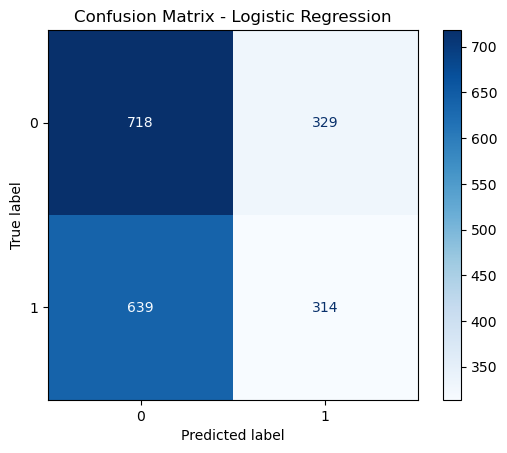

In [1531]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_dt = confusion_matrix(Y_test, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

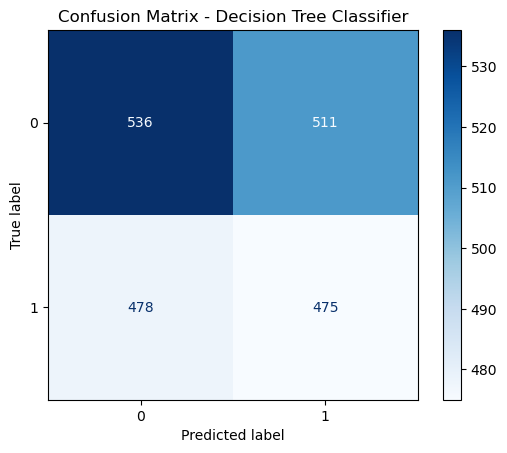

In [1525]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_dt = confusion_matrix(Y_test, Y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

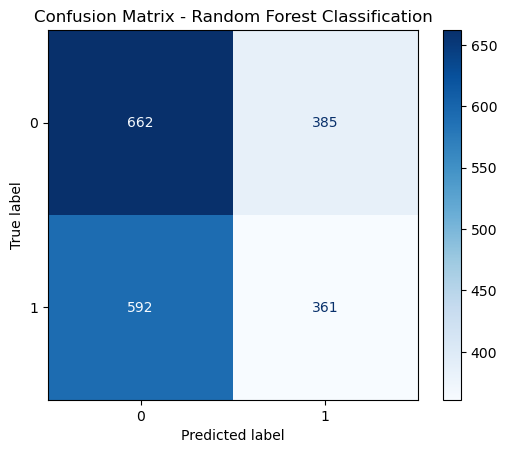

In [1527]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_dt = confusion_matrix(Y_test, Y_Pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classification")
plt.show()